In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

%matplotlib inline
# Plotar grafico
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
#libs importantes
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.saving import save_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

In [5]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/analise de credito/input/train.csv",low_memory=False)
train.head(5)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/analise de credito/input/test.csv",low_memory=False)
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,2022.000,Good,809.98,35.030,22 Years and 9 Months,No,49.575,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,4.000,Good,809.98,33.053,22 Years and 10 Months,No,49.575,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843,3,...,4.000,Good,809.98,33.812,NaN,No,49.575,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.000,Good,809.98,32.431,23 Years and 0 Months,No,49.575,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.987,2,...,5.000,Good,605.03,25.927,27 Years and 3 Months,No,18.816,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [7]:
print(train.shape)
print(test.shape)

(100000, 28)
(50000, 27)


In [8]:
df = train

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000,4194.171,3183.686,303.645,1625.568,3093.745,5957.448,15204.633
Num_Bank_Accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
Delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,98035.000,27.754,193.177,0.000,3.000,6.000,9.000,2597.000
Credit_Utilization_Ratio,100000.000,32.285,5.117,20.000,28.053,32.306,36.497,50.000
Total_EMI_per_month,100000.000,1403.118,8306.041,0.000,30.307,69.249,161.224,82331.000


In [11]:
print("Distribuição de classes de pontuação de crédito")
print("Poor: ",df['Credit_Score'].value_counts()['Poor'])
print("Standard: ",df['Credit_Score'].value_counts()['Standard'])
print("Good: ",df['Credit_Score'].value_counts()['Good'])

Distribuição de classes de pontuação de crédito
Poor:  28998
Standard:  53174
Good:  17828


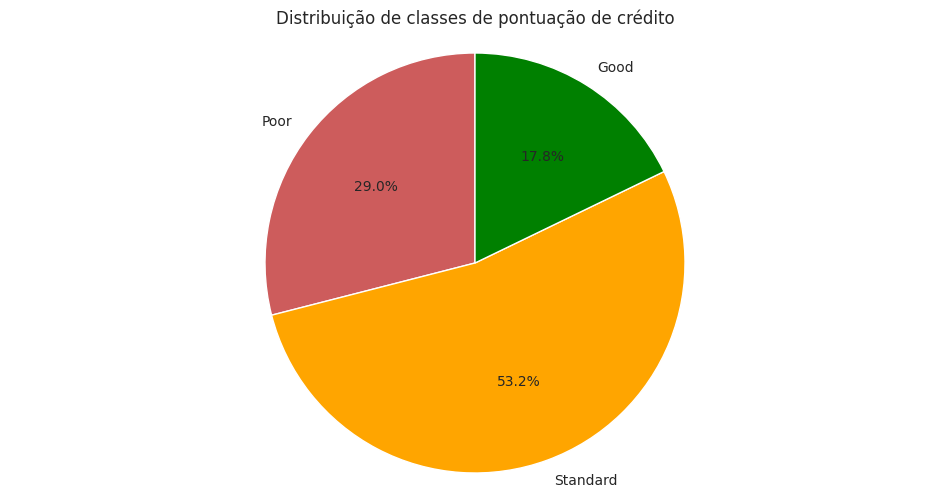

In [12]:
labels= ['Poor', 'Standard', 'Good']
colors=['indianred', 'orange', 'green']
credit = [df['Credit_Score'].value_counts()['Poor'],df['Credit_Score'].value_counts()['Standard'],df['Credit_Score'].value_counts()['Good']]
plt.pie(credit,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribuição de classes de pontuação de crédito')
plt.show()

In [13]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [14]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [16]:
df.isna().sum()[df.isna().sum() > 0]

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64


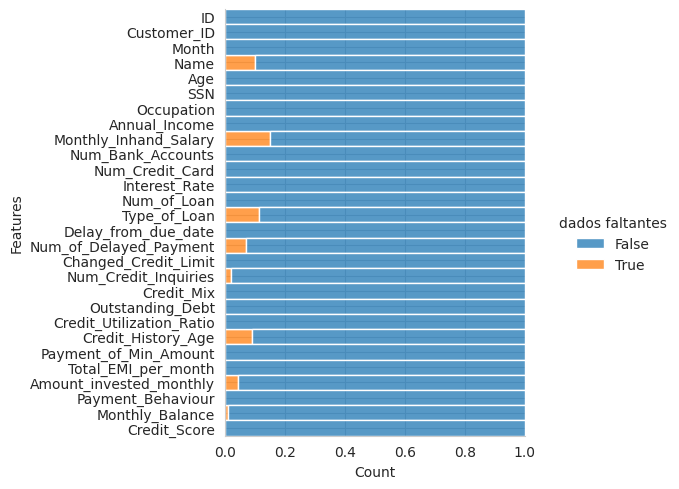

In [17]:
def na_ratio_plot(df=df):

    sns.displot(df.isna().melt(value_name='dados faltantes',var_name='Features')\
                ,y='Features',hue='dados faltantes',multiple='fill',aspect=9/8)

print(df.isna().sum()[df.isna().sum()>0])
na_ratio_plot()